<a href="https://colab.research.google.com/github/sadikinisaac/general/blob/master/EDAengine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# imports
import pandas as pd # for data load
import matplotlib.pylab as plt # Grpahical represntation
import numpy as np # for data related operations

In [0]:
# CSV file path. IT can be any resource.
file_name = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'

In [0]:
df = pd.read_csv(file_name)

In [4]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [6]:
#install seaborn for visual representation.
! pip install seaborn

In [0]:
import seaborn as sns
%matplotlib inline

In [8]:
# To find correlation abetween variable of type int or float we use corr function()
# Correlation is a statistical technique that can show whether and how strongly pairs of variables are related. 
# For example, height and weight are related; taller people tend to be heavier than shorter people.
df.corr()
# Its value varies from -1.0 to +1.0
# if correlation value is closer to +1.0, it means variable are positively related. e.g. A increases, B increases.
# if correlation value is closer to -1.0, it means variables are inversely related. e.g. A increases, B decreases.
# if correlation value is closer to 0, that mean variables are weakly related, not a good idea to relate them.

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [9]:
# lets find correlation between 'bore','stroke' ,'compression-ratio','horsepower'
df[['bore','stroke' ,'compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


In [0]:
#Continous Numerical Variable
#These are the variable which can take any numerical value between a range of values. 
#Numerical can have int or float data types.

In [10]:
# Lets check relationship between engine-size and price
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


(0, 53602.210675039925)

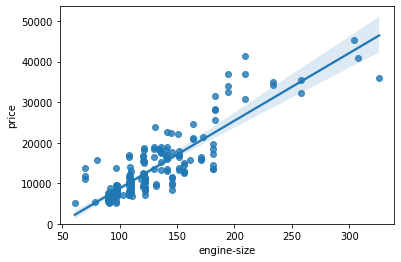

In [11]:
# its 0.872335 which means it is closer to +1.0. So it is positive linear relationship.
# That means car having big engines are expensive & actually this is true.
# But this relationship is not very clear. So now visualize this relationship
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

# engine-size is predictor and price is target. So the straight inclined line shows
# the linear relationship between these two variables.

In [12]:
# Lets calculate relationship between highway-mpg and price.
df[["highway-mpg", "price"]].corr()
# You see the negative value

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


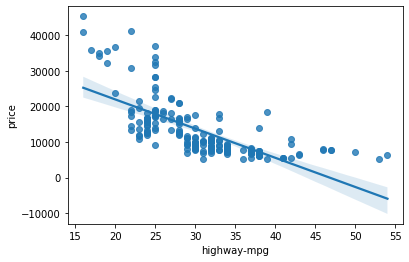

In [13]:
sns.regplot(x="highway-mpg", y="price", data=df)

In [0]:
# a declined line, this means inverse relationship. 
# when highway-mpg increases
# price decreases or vice and versa.

In [14]:
df[["peak-rpm", "price"]].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


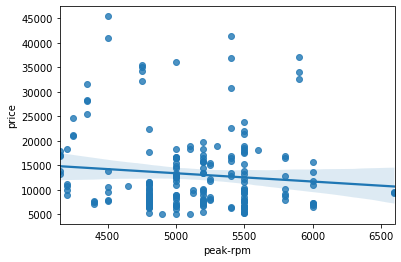

In [15]:
sns.regplot(x="peak-rpm", y="price",data = df)

In [16]:
df[["stroke", "price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


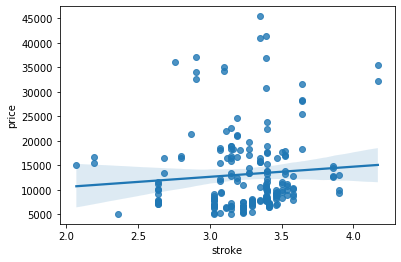

In [17]:
sns.regplot(x='stroke', y='price', data=df)

In [0]:
#weak relationship

In [0]:
#Categorical Value

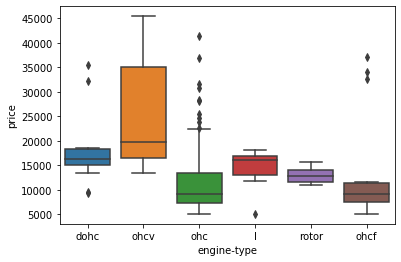

In [18]:
# Categorica values are the vairable which takes variable from a selected value range or specific values.
# int, float or object. e.g. Gender can take either Male/Female. Marital Status can take single, married or divorced.
sns.boxplot(x="engine-type", y="price", data=df)

In [0]:
# here engine-type is categorical value. 
# can see engine-type can take only 6 values... dohc, ohcv, ohc and others.
# in above example plotting the relationship between a categorical variable(engine-type) & target variable
# price.

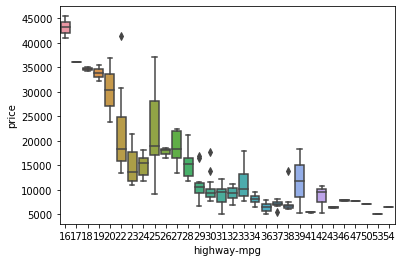

In [19]:
# plot boxplot for continous variable.  plot for highway-mpg & price.
# plot is useless as it has lots of variations and continous values. 
#prefer method for categorical variable.
sns.boxplot(x="highway-mpg", y="price", data=df)

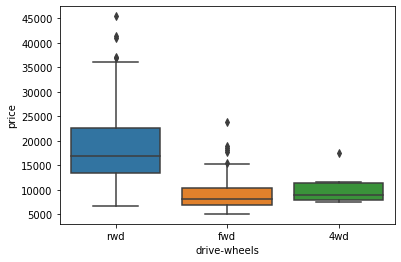

In [20]:
# Lets check the relationship between drive-wheels(categorical) & price
sns.boxplot(x="drive-wheels", y="price", data=df)

In [0]:
#how different drive-wheels affect the price. So it can be a good predictor.

In [0]:
#Descriptive Statistical Analysis

In [21]:
# describe()
df.describe() # it will show a summary of statsitical analysis of all the int or float variables

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [22]:
# to include objects  in dataset
df.describe(include=["object"])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [23]:
# value_counts()
# It tells you how many variables are there for each category
df["engine-type"].value_counts() # will show count of each engine type

ohc      145
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
Name: engine-type, dtype: int64

In [24]:
df['drive-wheels'].value_counts() #value count for drive wheels

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [25]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [26]:
engine_types = df["engine-type"].value_counts().to_frame()
engine_types.rename(columns={"engine-type" : "value_counts"}, inplace=True)
engine_types

,value_counts
ohc,145
ohcf,15
ohcv,13
l,12
dohc,12
rotor,4


In [27]:
# Chnage the name of the index
engine_types.index.name = 'engine-type-count'
engine_types

,value_counts
engine-type-count,
ohc,145
ohcf,15
ohcv,13
l,12
dohc,12
rotor,4


In [28]:
# Grouping means grouping data according to categorical variable.
# Get unique values
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [0]:
#on average, which type of drive wheel is most valuable, 
#  group "drive-wheels" and then average them.
df_group_one = df[['drive-wheels','body-style','price']]

In [30]:
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [31]:
# rwd wheel type is generally expensive than other drive-wheels
# grouping results
#  group by multiple column
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [32]:
# Pivot data
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  NaN           NaN  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

In [33]:
# groupby body-style
df[["body-style", "price"]].groupby(['body-style'], as_index=False).mean()

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

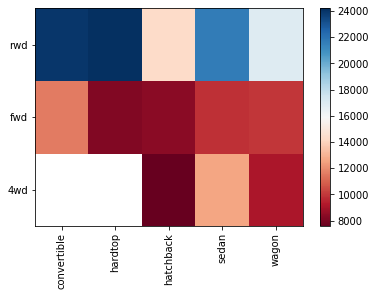

In [35]:
#Let's use a heat map to visualize the relationship between Body Style vs Price.

fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [0]:
#P-value:

#What is this P-value? A p-value is the probability of rejecting a null-hypothesis when the hypothesis is proven true. The null hypothesis is a statement that says that there is no difference between two measures.

#p-value is : 0.001: In this case we consider a strong relationship.
#the p-value is: 0.05: Here we consider a moderate relationship.
#the p-value is: 0.1: Weak relationship.
#the p-value is: 0.1: there is no evidence that the correlation is significant.

In [0]:
from scipy import stats

In [37]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


In [0]:
#Since the p-value is < < 0.001, 
#the correlation between wheel-base and price is statistically significant, 
#although the linear relationship isn't extremely strong (~0.585)

In [39]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("Pearson corr value =", pearson_coef, " & P-val =", p_value)

Pearson corr value = 0.8723351674455185  & P-val = 9.265491622198389e-64


In [0]:
#Conclusion:

#The p-value is 0.001, 
#which mean relationship between these two variable is strong, 
#and also the linear relationship is very strong (~0.872).